In [1]:
# Importing the basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Getting the list of files
skater_folder = "../skaters/"
skater_files = os.listdir(skater_folder)
team_folder = "../tmstats/"
team_files = os.listdir(team_folder)
print(team_files)
print(skater_files)

['2000_2001_tmstats.csv', '2001_2002_tmstats.csv', '2002_2003_tmstats.csv', '2003_2004_tmstats.csv', '2005_2006_tmstats.csv', '2006_2007_tmstats.csv', '2007_2008_tmstats.csv', '2008_2009_tmstats.csv', '2009_2010_tmstats.csv', '2010_2011_tmstats.csv', '2011_2012_tmstats.csv', '2012_2013_tmstats.csv', '2013_2014_tmstats.csv', '2014_2015_tmstats.csv', '2015_2016_tmstats.csv', '2016_2017_tmstats.csv', '2017_2018_tmstats.csv', '2018_2019_tmstats.csv', '2019_2020_tmstats.csv', '2020_2021_tmstats.csv', '2021_2022_tmstats.csv', 'playoff_stats_2005_2021.csv', 'points_rate_allyears.csv', 'TeamCleaned.csv', 'TeamData.csv', 'tmstats_allyears.csv', 'tm_player_stats_2005_2021.csv', 'win_rate_allyears.csv']
['2010_2011_skater.csv', '2011_2012_skater.csv', '2012_2013_skater.csv', '2013_2014_skater.csv', '2014_2015_skater.csv', '2015_2016_skater.csv', '2016_2017_skater.csv', '2017_2018_skater.csv', '2018_2019_skater.csv', '2019_2020_skater.csv', '2020_2021_skater.csv', '2021_2022_skater.csv', 'skaters_

In [8]:
# This function pulls the win rates from a given team stats dataframe and 
# returns a dictionary with team abbreviations as keys and win rates as values.
# This is used in the next code chunk, were I build one giant skater dataframe
# with all years and add the team's win rate as a column.

abbrevs = pd.read_csv("../team_abbreviations.csv", header=None,names=['abbreviation','full_name'])

def team_wins_dict(teams_df):
    twd = {}
    for index,row in abbrevs.iterrows():
        full_name = row['full_name']
        name_list = full_name.split()
        mascot = name_list[-1].split('/')[-1]
        for t_index,t_row in teams_df.iterrows():
            if "original" in mascot:
                break
            elif mascot in t_row["Team"]:
                winrate = t_row['W']/t_row['GP']
                twd[row['abbreviation']]= winrate
                break
    return twd
        


In [9]:
# Here's an example:

exteam = pd.read_csv(team_folder+team_files[10])
print(exteam)
print(team_wins_dict(exteam))


    Rk                   Team  AvAge  GP   W   L  OL  PTS   PTS%   GF  ...  \
0    1     Vancouver Canucks*   28.5  82  51  22   9  111  0.677  241  ...   
1    2       St. Louis Blues*   26.5  82  49  22  11  109  0.665  206  ...   
2    3      New York Rangers*   26.5  82  51  24   7  109  0.665  222  ...   
3    4   Pittsburgh Penguins*   28.5  82  51  25   6  108  0.659  273  ...   
4    5   Nashville Predators*   26.8  82  48  26   8  104  0.634  232  ...   
5    6   Philadelphia Flyers*   27.3  82  47  26   9  103  0.628  260  ...   
6    7         Boston Bruins*   28.8  82  49  29   4  102  0.622  260  ...   
7    8     New Jersey Devils*   30.1  82  48  28   6  102  0.622  216  ...   
8    9     Detroit Red Wings*   30.0  82  48  28   6  102  0.622  239  ...   
9   10    Chicago Blackhawks*   27.0  82  45  26  11  101  0.616  241  ...   
10  11       Phoenix Coyotes*   28.9  82  42  27  13   97  0.591  210  ...   
11  12       San Jose Sharks*   28.1  82  43  29  10   96  0.585

In [10]:
# Building a dataframe with all of the player data

all_skaters_data = pd.DataFrame()
for i in range(len(skater_files)-1):
    skaters = pd.read_csv(skater_folder+skater_files[i])
    teams = pd.read_csv(team_folder+team_files[i+9])
    wins_dict = team_wins_dict(teams)
#    if i == 4:
#        continue
    winrates = np.zeros(len(skaters))
    years = np.zeros(len(skaters))
    for ind, row in skaters.iterrows():
        thisteam=row['Tm']
        if 'TOT' in thisteam:
            winrates[ind] = float('nan')
        elif 'VEG' in thisteam: # Vegas changed their abbreviation a few years ago
            winrates[ind] = wins_dict['VGK']
        else:
            winrates[ind] = wins_dict[thisteam]
        years[ind] = i+2010
    skaters['Winrate'] = winrates
    skaters['Year'] = i+2010
    all_skaters_data = pd.concat([all_skaters_data,skaters],
                                ignore_index=True)
        

In [11]:
all_skaters_data.columns[6:-3]

Index(['G', 'A', 'PTS', '+/-', 'PIM', 'PS', 'EV', 'PP', 'SH', 'GW', 'EV.1',
       'PP.1', 'SH.1', 'S', 'S%', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL'],
      dtype='object')

In [12]:
from scipy.stats import linregress
# Using this for now to get a quick and dirty p-value for each player stat
# Will try to build a more complex linear model in sklearn later

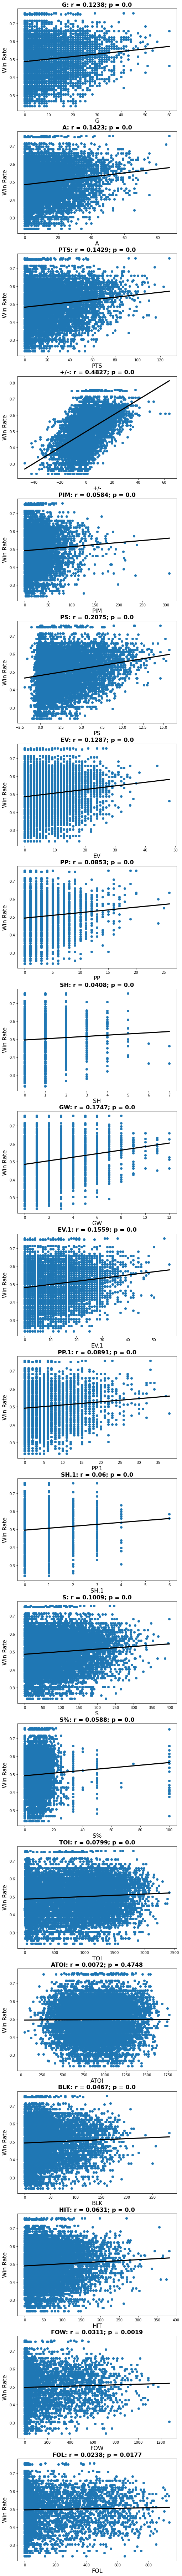

In [13]:
# Making Scatter Plots of everything

fig, axs = plt.subplots(len(all_skaters_data.columns[6:-3]), figsize=(8,6*22))

for i, col in enumerate(all_skaters_data.columns[6:-3]):
    if 'ATOI' in col: # This one is given as a string for some reason
        x = np.zeros(len(all_skaters_data[col]))
        for j, time in enumerate(all_skaters_data[col].values):
            timelist = time.split(':')
            x[j] = 60*float(timelist[0])+float(timelist[1])
    else:
        x = all_skaters_data[col].values
    y = all_skaters_data["Winrate"].values
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = linregress(x[mask],y[mask])
    x_hat = np.linspace(np.nanmin(x),np.nanmax(x), num=100)
    y_hat = x_hat*slope + intercept
    axs[i].scatter(x,y)
    axs[i].plot(x_hat,y_hat,color='black',linewidth=3)
    axs[i].set_title(str(col)+': r = '+str(round(r_value,4))+'; p = '+str(round(p_value,4)),fontsize=16,fontweight='bold')
    axs[i].set_xlabel(col, fontsize=16)
    axs[i].set_ylabel("Win Rate",fontsize=16)